In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameter p
p = 1

# Function to compute d_n_i based on the given equation
def d_n_i(n, i):
    return np.math.factorial(n + i) // (np.math.factorial(n) * np.math.factorial(i))

# Function to calculate the K_i value
def K_i(n, i, m):
    return d_n_i(n, i) / d_n_i(n, m)

# Function to check the validity of the inequality for given m and n
def is_valid(m, n):
    if m < n:
        return False
    # Calculate the left side of the inequality
    left_side = (n / (2 * d_n_i(n, m))) + (n - 2) / 2

    # Calculate the right side of the inequality (the summation)
    right_side = 0
    for i in range(m - n + 1, m):
        Ki = K_i(n, i, m)
        right_side += Ki ** 2 + p * Ki

    # Return whether the inequality holds
    return left_side >= right_side

# Generate n and m values for analysis
n_values = np.arange(1, 16)  # Set range for n (1 to 15)
m_values = np.arange(1, 200)  # Reasonable range for m

# Generate valid ranges
valid_ranges = np.zeros((len(n_values), len(m_values)))

for i, n in enumerate(n_values):
    for j, m in enumerate(m_values):
        if m >= n:
            valid_ranges[i, j] = is_valid(m, n)




<ipython-input-89-76f684829625>:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(n + i) // (np.math.factorial(n) * np.math.factorial(i))


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

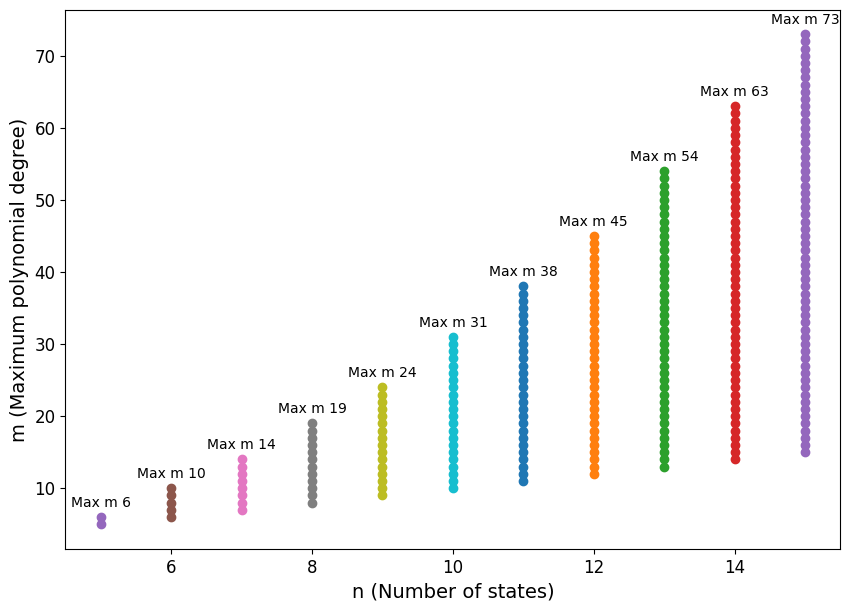

In [102]:
# Plot the valid ranges using scatter plot
Q = []
for i in range(np.shape(valid_ranges)[0]):
    if np.any(valid_ranges[i] == 1):  # Check if there are any 1s in the row
        Q.append(np.max(np.where(valid_ranges[i] == 1)) + 1)
    else:
        Q.append(0)

plt.figure(figsize=(10, 7))
y = []
for i in range(np.shape(valid_ranges)[0]):
    x = []
    for j in range(np.shape(valid_ranges)[1]):
        if valid_ranges[i, j]:
            x.append(m_values[j])  # Actual m value instead of index
    plt.scatter([n_values[i]] * len(x), x)  # Actual n value instead of index
    y.append(len(x))

    # Annotate the maximum m value above the column
    if Q[i] > 0:
        plt.text(n_values[i], Q[i] + 1, f"Max m {Q[i]}", ha='center', va='bottom', color='black')

plt.ylabel('m (Maximum polynomial degree)', fontsize=14)  # Increased font size
plt.xlabel('n (Number of states)', fontsize=14)  # Increased font size
#plt.title('Valid Ranges for Various n and m Values with Annotations', fontsize=16)  # Increased font size
plt.xticks(fontsize=12)  # Increase size of x-axis tick labels
plt.yticks(fontsize=12)  # Increase size of y-axis tick labels


In [105]:
def O_original(n, m, k):
    d_n_m = d_n_i(n, m)
    return ((k + n / 2) + (n / 2) * d_n_m) * d_n_m

def O_new(n, m, k):
    result = 0
    for i in range(m - n + 1, m + 1):
        d_n_i_val = d_n_i(n, i)
        result += d_n_i_val * (d_n_i_val + k)
    return result
print(O_new(10,31,d_n_i(10,31)))
print(O_original(10,31,d_n_i(10,31)))
print(O_original(10,31,d_n_i(10,31))-O_new(10,31,d_n_i(10,31)))

7506897422720238016
7.5411833013132e+18
3.428587859296256e+16


<ipython-input-89-76f684829625>:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(n + i) // (np.math.factorial(n) * np.math.factorial(i))


In [73]:
z=[]
for i in range(2,len(y)):
  z.append(y[i]-y[i-1])
print(y)
print(z)

[0, 0, 0, 0, 2, 5, 8, 12, 16, 22, 28, 34, 42, 50, 59, 68, 78, 89, 101, 113, 126, 140, 154, 169, 185, 201, 218, 236, 255, 274]
[0, 0, 2, 3, 3, 4, 4, 6, 6, 6, 8, 8, 9, 9, 10, 11, 12, 12, 13, 14, 14, 15, 16, 16, 17, 18, 19, 19]


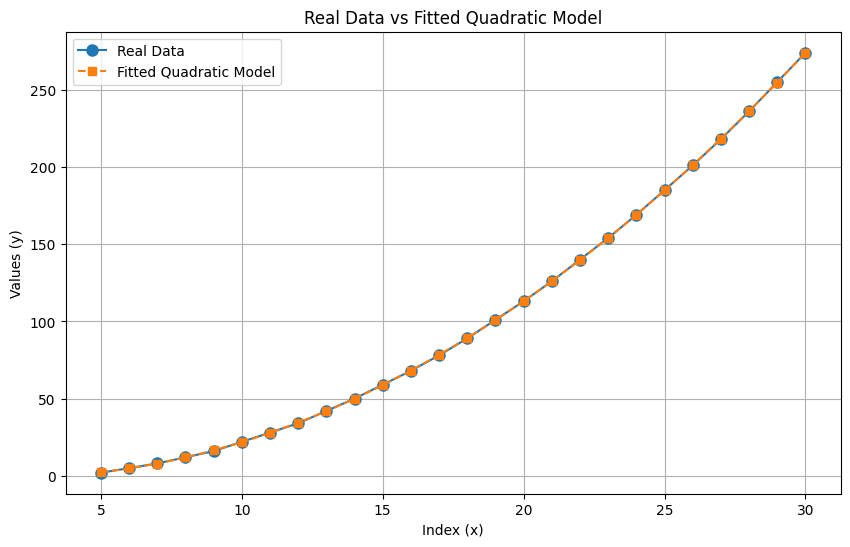

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Given sequence
yy = np.array([2, 5, 8, 12, 16, 22, 28, 34, 42, 50, 59, 68, 78, 89, 101, 113, 126, 140, 154, 169, 185, 201, 218, 236, 255, 274])

# Create x values (the indices)
xx = np.arange(5, 4+len(yy) + 1)

# Fit a quadratic model: y = ax^2 + bx + c
# Create the feature matrix with x^2 and x
X = np.vstack([xx**2, xx]).T

# Fit a linear regression model to predict y from [x^2, x]
model = LinearRegression()
model.fit(X, yy)

# Get the coefficients
a, b = model.coef_
c = model.intercept_

a, b, c
# Predict values using the fitted model
y_pred = model.predict(X)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((yy - y_pred) ** 2)

mse
# Plot the real data and the predicted data
plt.figure(figsize=(10, 6))
plt.plot(xx, yy, 'o-', label='Real Data', markersize=8)  # Plot real data
plt.plot(xx, y_pred, 's--', label='Fitted Quadratic Model', markersize=6)  # Plot predicted data

# Adding labels and title
plt.xlabel('Index (x)')
plt.ylabel('Values (y)')
plt.title('Real Data vs Fitted Quadratic Model')
plt.legend()
plt.grid(True)
plt.show()
